## Packages Used

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

from sklearn import metrics



In [2]:
from sklearn.manifold import TSNE, Isomap

## Data Exploration

This dataset has 37 features of information related to students, the objective is detect students that are in high risk of droping out.

In [4]:
df=pd.read_csv("data.csv")
data=df.copy() ## This table will not be modified
df.head()



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.shape

(4424, 37)

In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mothers qualification                           4424 non-null   int64  
 9   Fathers qualification                    

In [8]:
df.isna().any().any()  ## NO NAs

False

## Data Exploration

C:\Users\MS-XUserPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


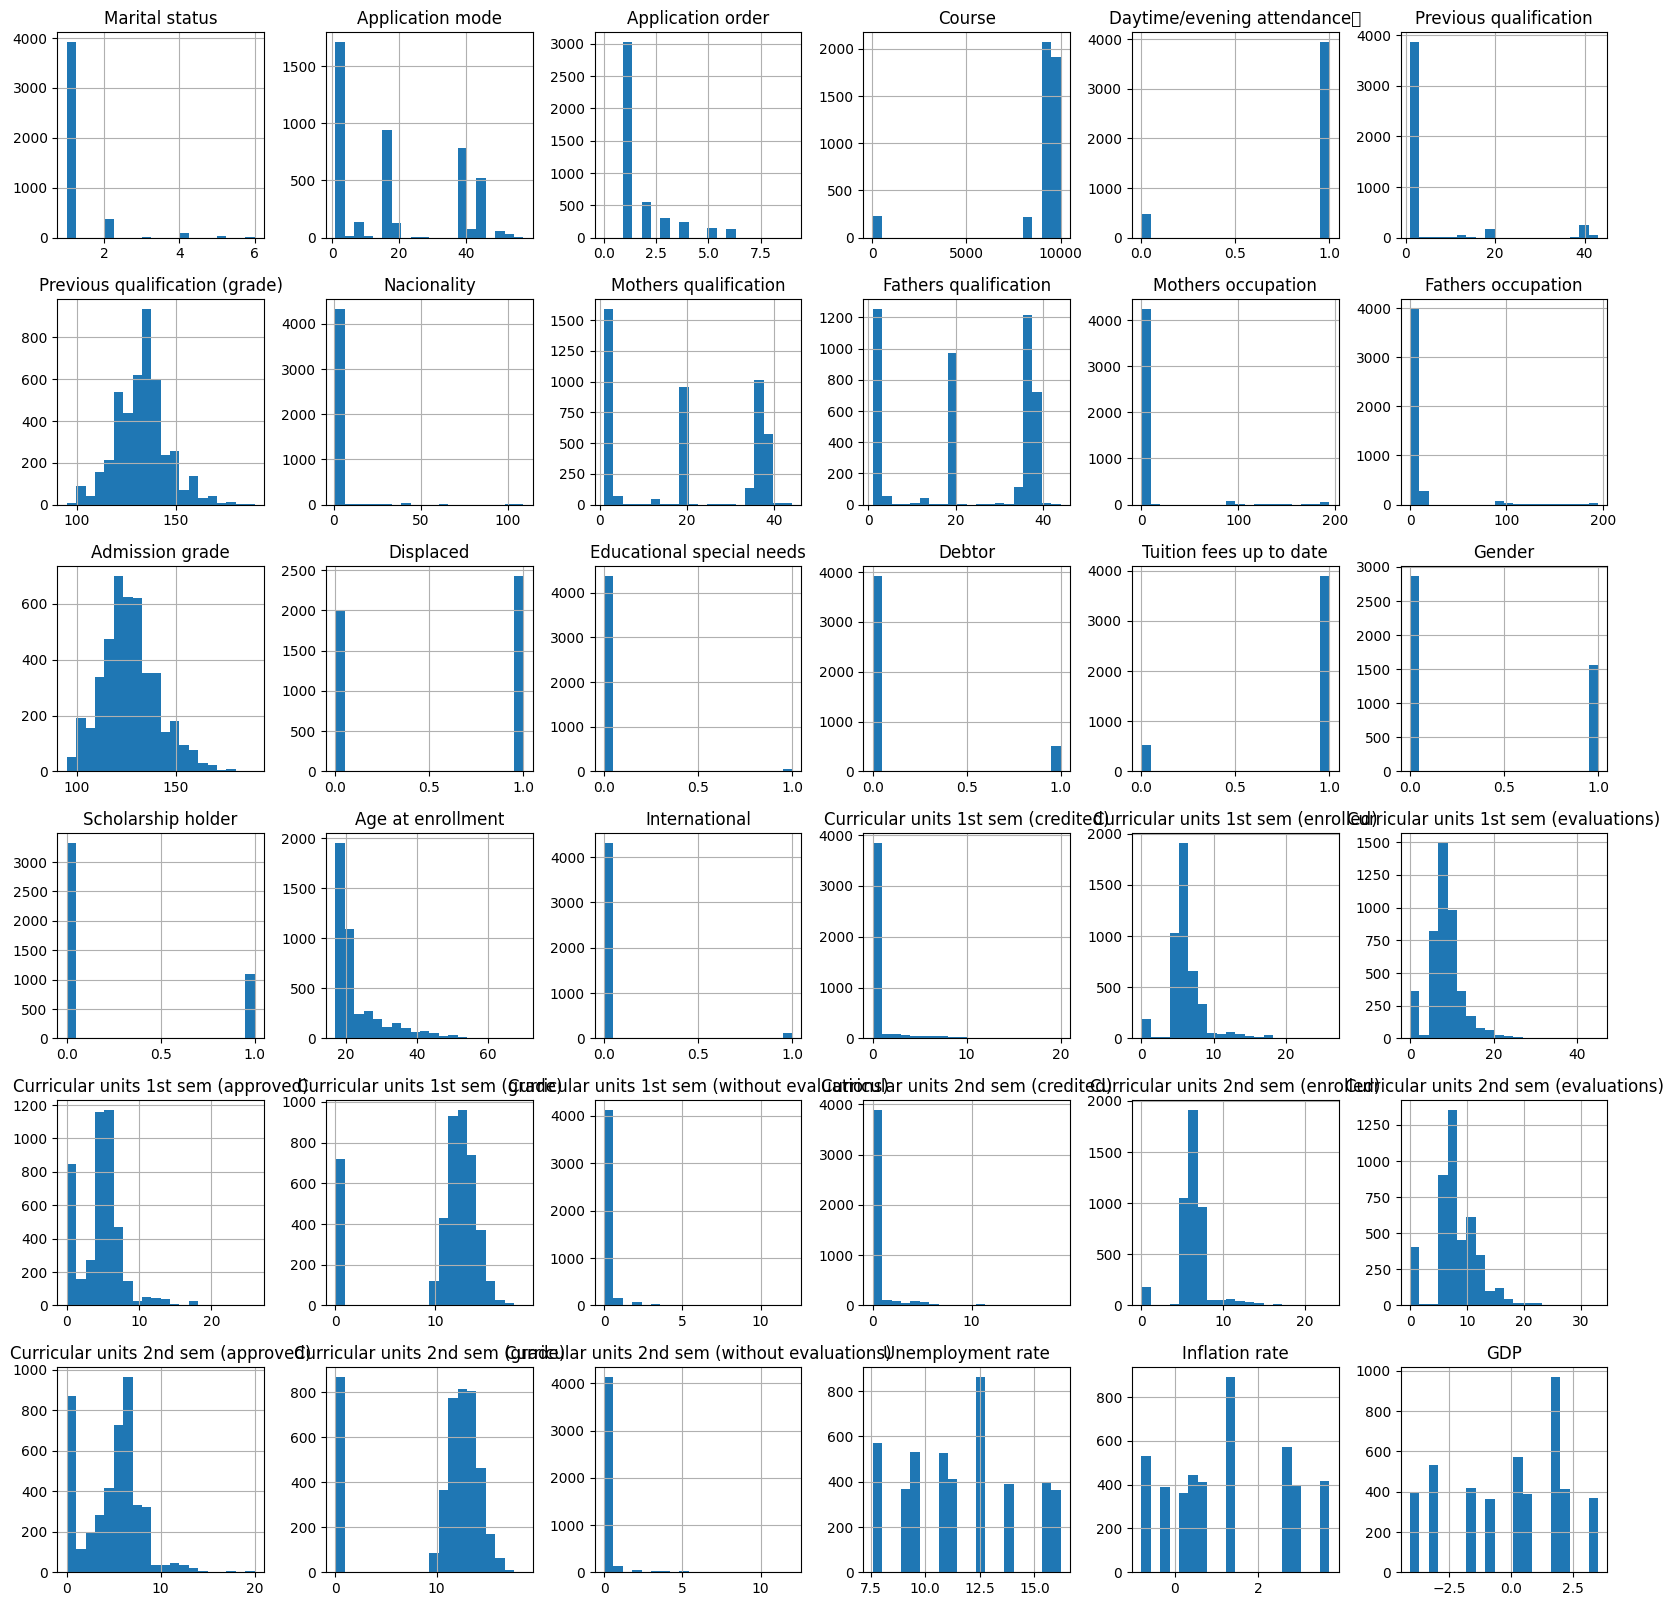

In [9]:
# Distribution of each feature
data.hist(figsize=(20, 20), bins=20)
plt.show()

<BarContainer object of 3 artists>

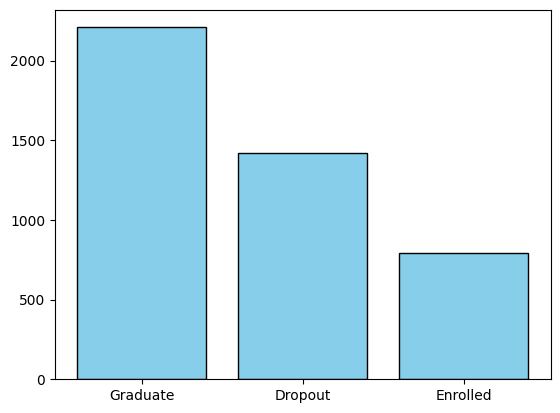

In [10]:
Tar = data['Target'].value_counts()

# Create the histogram
plt.bar(Tar.index, Tar.values, color='skyblue', edgecolor='black')

In [11]:
pq= data['Previous qualification'].value_counts()
pq

Previous qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64

##  Data Preprocessing

In [12]:
# I wanted to drop mothers and fathers occupation but it seems correlated with the output
CrosstabResult=pd.crosstab(index=data['Mothers occupation'],columns=data['Target'])
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]

1.63085860350197e-31

In [13]:
CrosstabResult=pd.crosstab(index=data['Fathers occupation'],columns=data['Target'])
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]

4.51543856251902e-19

In [14]:
CrosstabResult=pd.crosstab(index=data['Course'],columns=data['Target'])
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]

2.3165709040666167e-97

In [15]:

# TARGET
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(data['Target'])

# MARITAL STATUS
df['Marital status']=data['Marital status'].map({1:0,2:1,3:0,4:0,5:1,6:0}) # People who are married or in facto union are 1 (Observe that the majority of the people are single)


### ONE HOT ENCODER 
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first').set_output(transform='pandas') #drop = 'first' (Try)

# APLICATION MODE ENCODING
ohe_Application_mode=ohe.fit_transform(df[['Application mode']])
ohe_Application_mode.sum()
#Drop small categories (with less than 10 samples)
columns_to_drop_1 = [col for col in ohe_Application_mode.columns if ohe_Application_mode[col].sum() < 150]
ohe_Application_mode = ohe_Application_mode.drop(columns=columns_to_drop_1)

# COURSE ENCODING
ohe_Course=ohe.fit_transform(df[['Course']]) #The sizes of the categories are simmilar among them
ohe_Course.sum()

# PREVIOUS QUALIFICATION ENCODING
threshold2=50
ohe_Previous_qualification=ohe.fit_transform(df[['Previous qualification']])
#Drop small categories (with less than 10 samples)
columns_to_drop_2 = [col for col in ohe_Previous_qualification.columns if ohe_Previous_qualification[col].sum() < 100]
ohe_Previous_qualification = ohe_Previous_qualification.drop(columns=columns_to_drop_2)


# MOTHERS AND FATHER OCCUPATION
ohe_Mothers_occupation=ohe.fit_transform(df[['Mothers occupation']])
columns_to_drop_3 = [col for col in ohe_Mothers_occupation.columns if ohe_Mothers_occupation[col].sum() < 190]
ohe_Mothers_occupation=ohe_Mothers_occupation.drop(columns=columns_to_drop_3)
ohe_Fathers_occupation=ohe.fit_transform(df[['Fathers occupation']])
columns_to_drop_4 = [col for col in ohe_Fathers_occupation.columns if ohe_Fathers_occupation[col].sum() < 150]
ohe_Fathers_occupation=ohe_Fathers_occupation.drop(columns=columns_to_drop_4)


# NACIONALITY
df['Nacionality'] = data['Nacionality'].apply(lambda x: 0 if x > 1 else x) # 1 - portuguese


#Did the parents pursue higher education or finish high school?, if yes 1 else 0
higher_edu={1,2,3,4,5,6,18,22,39,40,41,42,43,44}
df['Mothers qualification']=data['Mothers qualification'].apply(lambda x: 1 if x  in higher_edu else 0)
df['Fathers qualification']=data['Fathers qualification'].apply(lambda x: 1 if x  in higher_edu else 0)

In [16]:
#I decided to DROP SOME COLUMNS:
#sum(df['International']==df['Nacionality']) #One is the inverse of the other.
df=df.drop('International', axis=1) #Is similar to nationality


In [17]:
ohe_Previous_qualification.sum().mean()
ohe_Mothers_occupation.sum().mean()
ohe_Fathers_occupation.sum().mean()

442.77777777777777

In [18]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
mapping

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

C:\Users\MS-XUserPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\MS-XUserPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


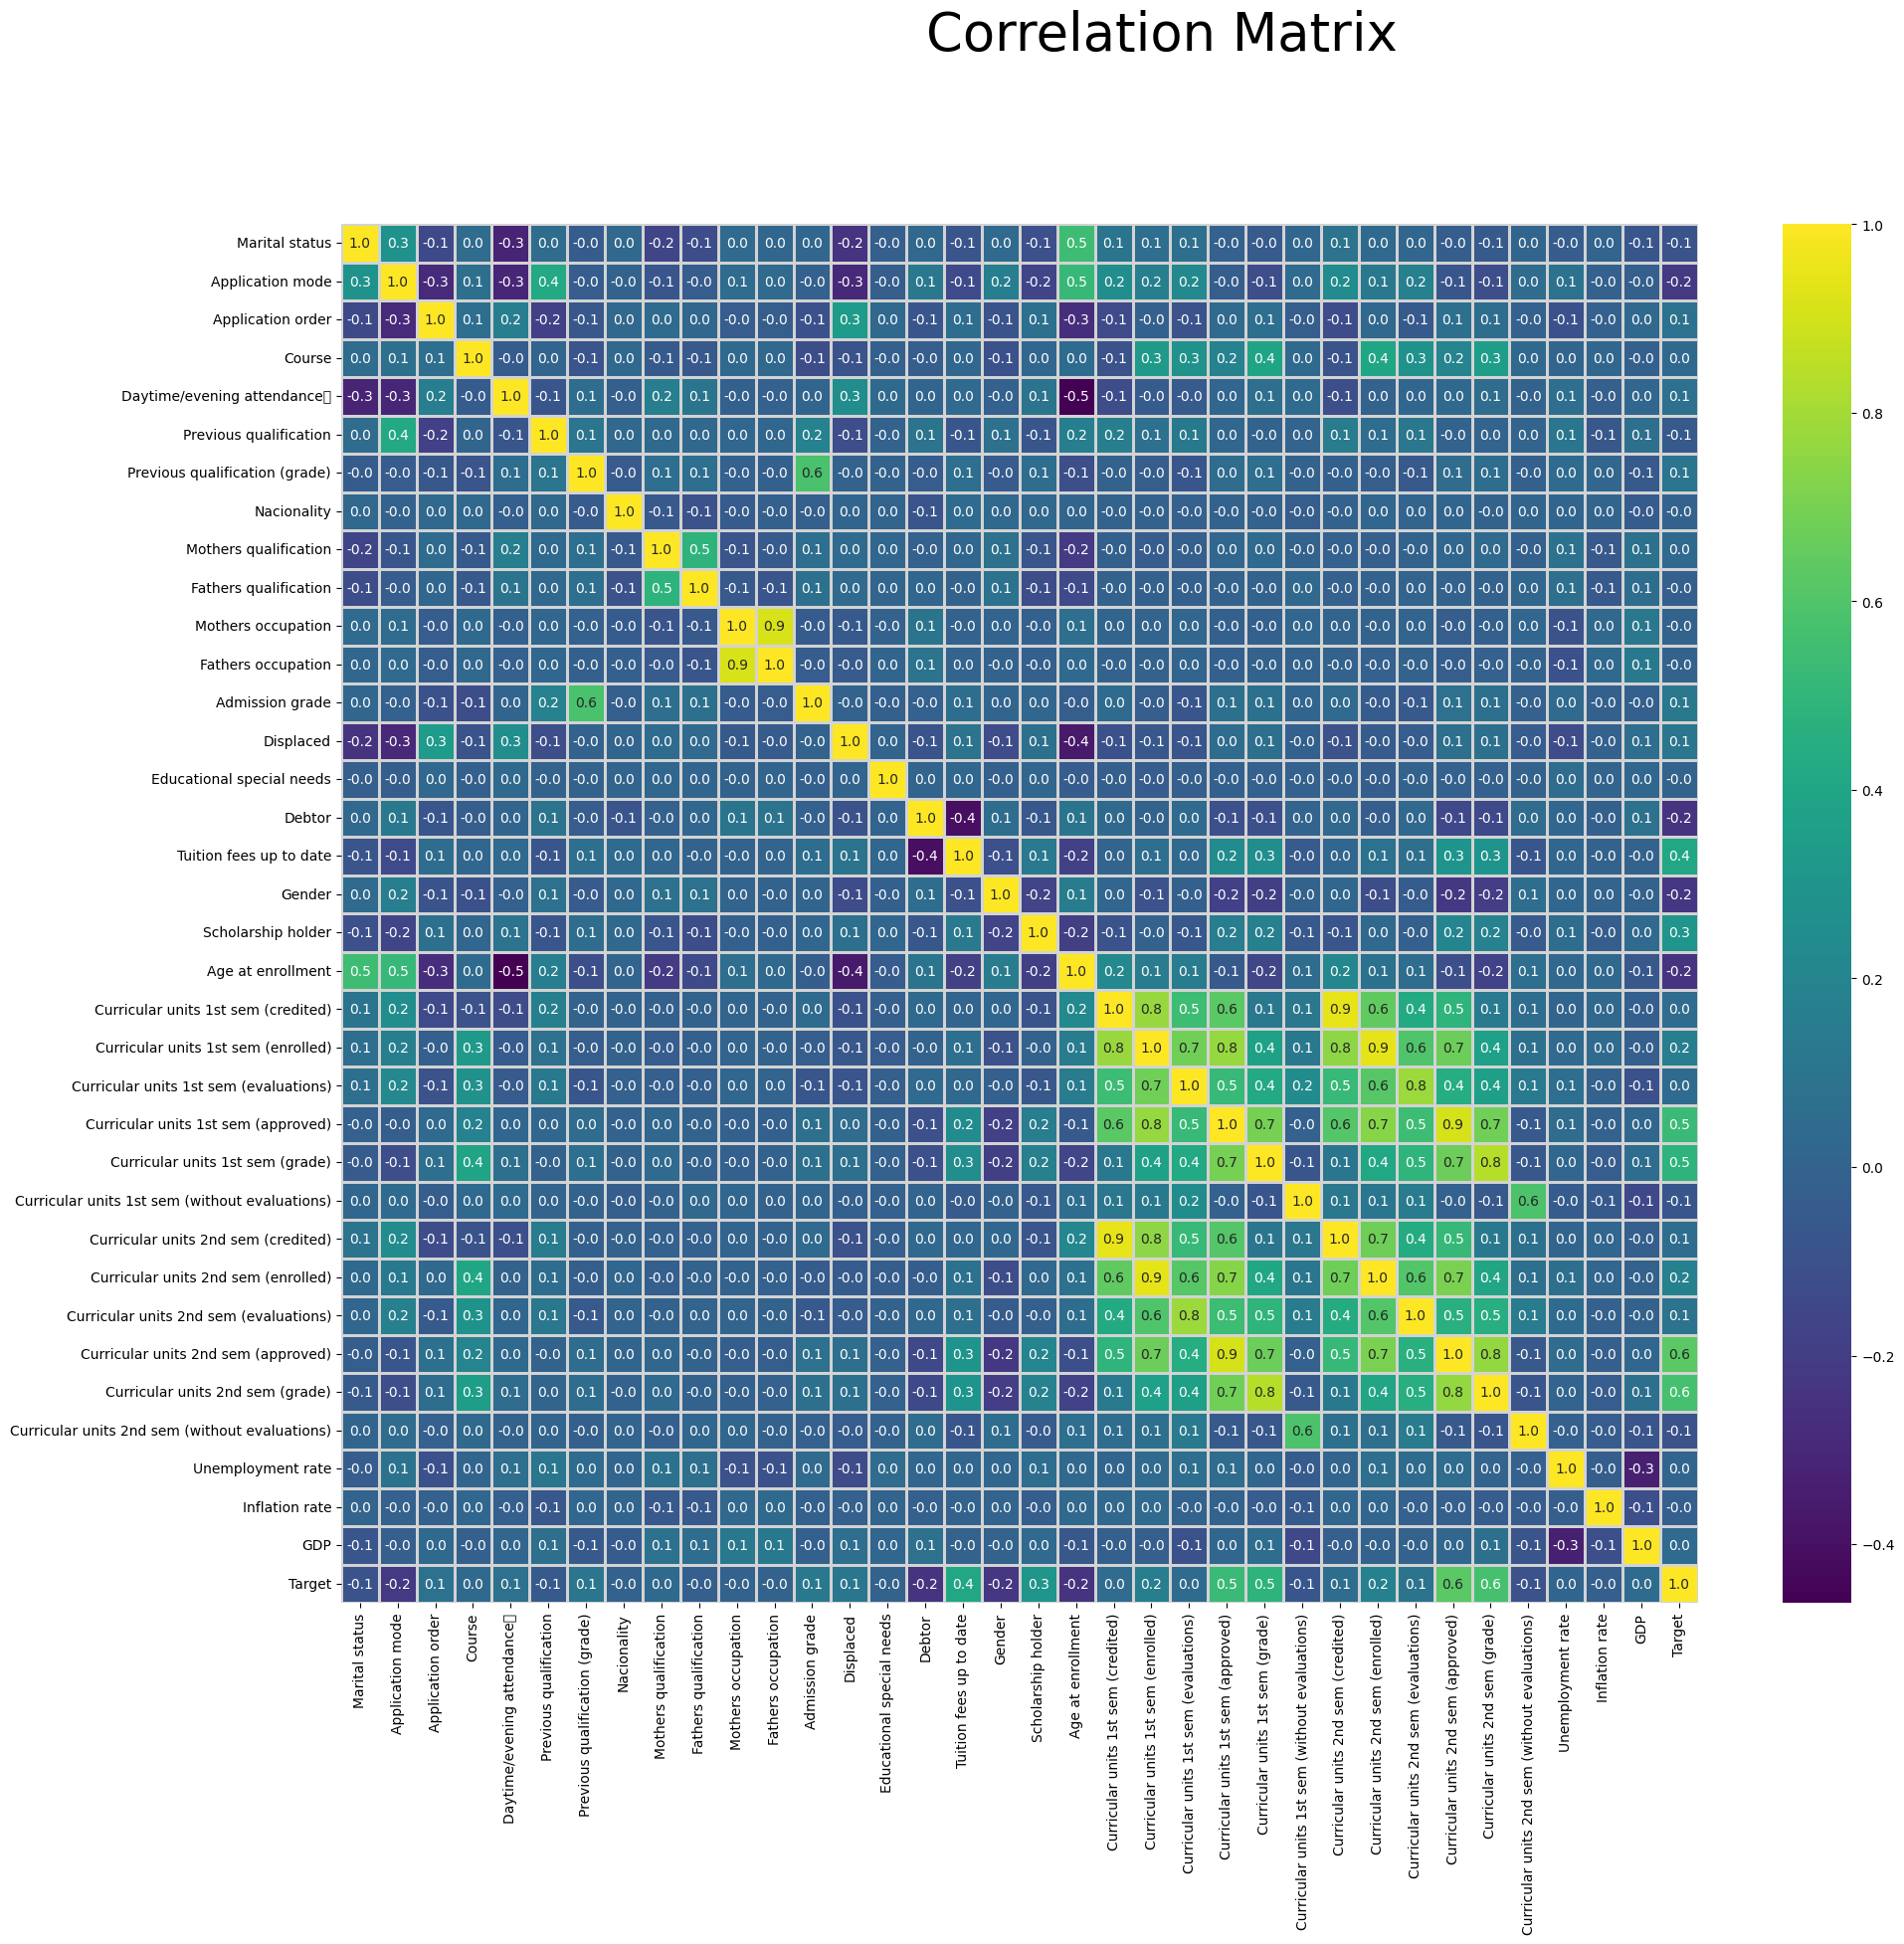

In [19]:
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=38, y=1)
plt.show()

Adding the encoded variables to the dataset:

In [20]:
data_encoded = pd.concat([df, ohe_Application_mode,ohe_Course,ohe_Previous_qualification,ohe_Fathers_occupation,ohe_Mothers_occupation], axis=1)
col_to_drop=['Application mode','Course','Previous qualification','Fathers occupation','Mothers occupation']
data_encoded =data_encoded.drop(columns=col_to_drop)

In [21]:
data_encoded.shape

(4424, 69)

## Training and Testing datasets

In [22]:
y=data_encoded.loc[:,"Target"]
x=data_encoded.loc[:,data_encoded.columns != "Target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_tr = scaler.transform(X_train)
X_ts = scaler.transform(X_test)

X_tr=pd.DataFrame(X_tr)
X_ts=pd.DataFrame(X_ts)

## PCA decomposition

In [23]:
pca = PCA(n_components=10)  ## is it better with PCA decompostion or FA?
pca_tr = pca.fit_transform(X_tr)
pca_ts = pca.transform(X_ts)
pca_tr.shape

(3539, 10)

<Axes: xlabel='num_components'>

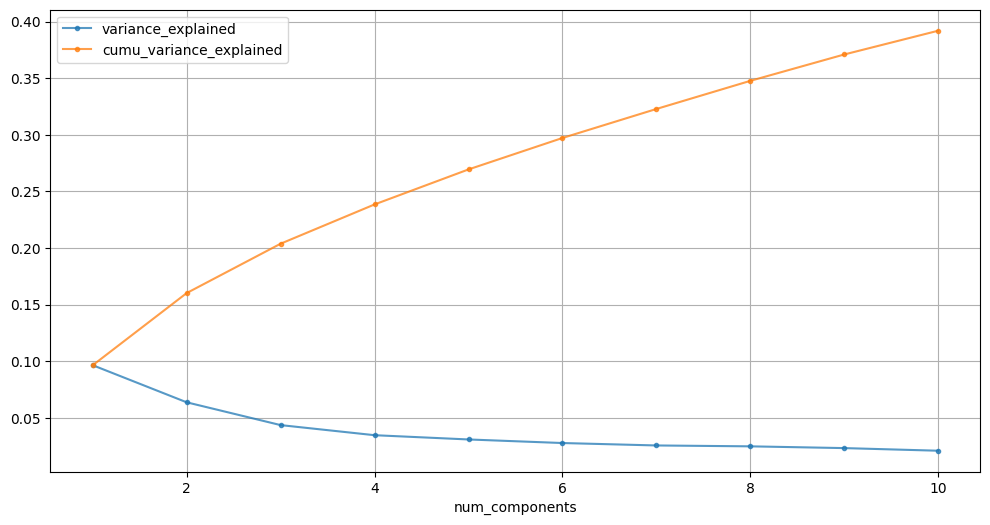

In [24]:
(pd.DataFrame({'num_components':np.arange(1, 11), 
              'variance_explained':pca.explained_variance_ratio_,
              'cumu_variance_explained':np.cumsum(pca.explained_variance_ratio_)})
.set_index(['num_components'])
.plot(style='.-', grid=True, alpha=0.75, figsize=(12,6))
)

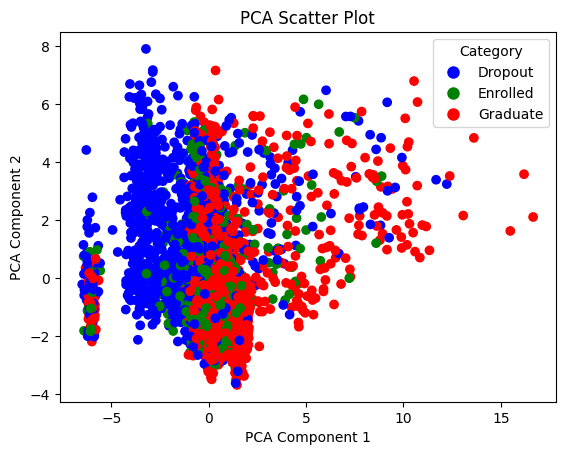

In [25]:
pca_tr=pd.DataFrame(pca_tr)
colors = {0: 'blue', 1: 'green', 2: 'red'} #{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
labels = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_colors = [colors[label] for label in y_train]
plt.scatter(pca_tr.iloc[:,0], pca_tr.iloc[:,1], color=target_colors, label=y_train)

# Get the handles and labels from the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in colors]
labels = [labels[label] for label in colors]

plt.legend(handles, labels, title="Category")

# Add title and labels
plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()

## Factor Analysis

In [26]:
from sklearn.decomposition import FactorAnalysis


fa = FactorAnalysis(n_components = 10)

faResult = fa.fit_transform(X_tr)

faResult.shape

(3539, 10)

In [27]:
 
# variance explained
faLoadings = fa.components_.T

# total variance of original variables
faTotalVar = X_tr.var(axis=0).sum()  

faVarExp = np.sum(faLoadings**2, axis=0)

varExpRatio = faVarExp/faTotalVar

sum(varExpRatio)

0.3179501090978973

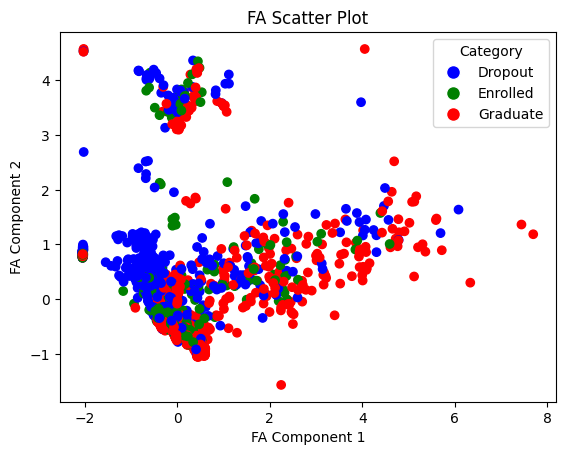

In [28]:
fa_tr=pd.DataFrame(faResult)
colors = {0: 'blue', 1: 'green', 2: 'red'} #{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
labels = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_colors = [colors[label] for label in y_train]
plt.scatter(fa_tr.iloc[:,0], fa_tr.iloc[:,1], color=target_colors, label=y_train)


# Get the handles and labels from the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in colors]
labels = [labels[label] for label in colors]

plt.legend(handles, labels, title="Category")

# Add title and labels
plt.title('FA Scatter Plot')
plt.xlabel('FA Component 1')
plt.ylabel('FA Component 2')

# Show the plot
plt.show()

## Other dimensionality reduction  techniques

In [29]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tr)

# Perform Isomap
isomap = Isomap(n_components=10)
X_isomap = isomap.fit_transform(X_tr)

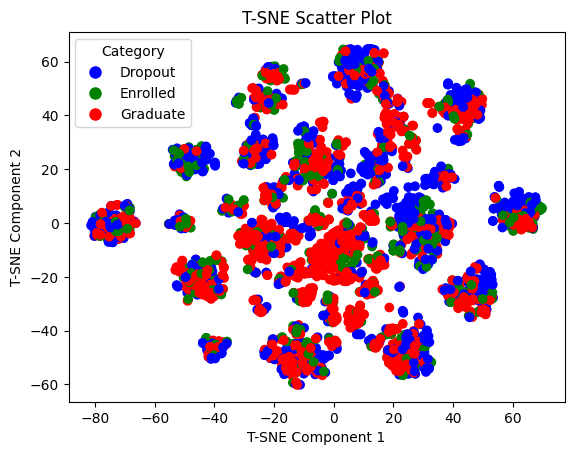

In [30]:
tsne_tr=pd.DataFrame(X_tsne)
colors = {0: 'blue', 1: 'green', 2: 'red'} #{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
labels = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_colors = [colors[label] for label in y_train]
plt.scatter(tsne_tr.iloc[:,0], tsne_tr.iloc[:,1], color=target_colors, label=y_train)


# Get the handles and labels from the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in colors]
labels = [labels[label] for label in colors]

plt.legend(handles, labels, title="Category")

# Add title and labels
plt.title('T-SNE Scatter Plot')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')

# Show the plot
plt.show()

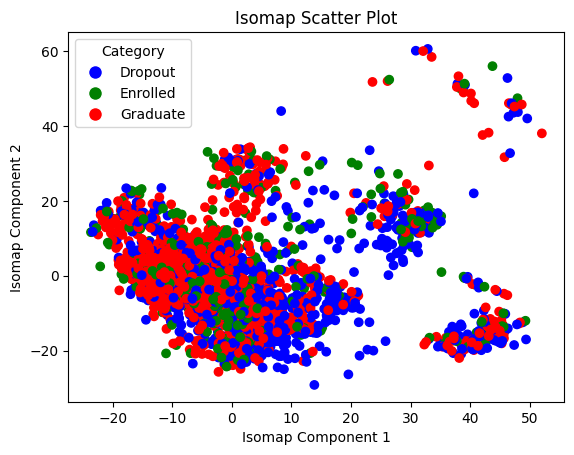

In [31]:
iso_tr=pd.DataFrame(X_isomap)
colors = {0: 'blue', 1: 'green', 2: 'red'} #{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
labels = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_colors = [colors[label] for label in y_train]
plt.scatter(iso_tr.iloc[:,0], iso_tr.iloc[:,1], color=target_colors, label=y_train)


# Get the handles and labels from the scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10) for label in colors]
labels = [labels[label] for label in colors]

plt.legend(handles, labels, title="Category")

# Add title and labels
plt.title('Isomap Scatter Plot')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')

# Show the plot
plt.show()

## K- Means

In [32]:
kmModel = KMeans(n_clusters=3, random_state=2024)
kmLabel = kmModel.fit_predict(pca_tr)
kmDataDf = pca_tr.assign(cluster_label = lambda x: kmLabel.flatten())

CrosstabResult=pd.crosstab(index=y_train,columns=kmDataDf['cluster_label'])
CrosstabResult # This is so bad!, maybe PCA wasn't a good option 

cluster_label,0,1,2
Target,,,
0,57,572,239
1,44,332,139
2,85,964,396


In [33]:
print(metrics.rand_score(y_train, kmDataDf['cluster_label']))
print(metrics.adjusted_rand_score(y_train, kmDataDf['cluster_label']))

0.5824415369337644
0.17061777584936016


In [37]:
kmModel = KMeans(n_clusters=3, random_state=2024)
kmLabel = kmModel.fit_predict(X_tr)
kmDataDf = X_tr.assign(cluster_label = lambda x: kmLabel.flatten())

CrosstabResult=pd.crosstab(index=y_train,columns=kmDataDf['cluster_label'])
CrosstabResult # This is so bad!, maybe PCA wasn't a good option 

cluster_label,0,1,2
Target,,,
0,209,33,626
1,128,20,367
2,318,76,1051


In [38]:
print(metrics.rand_score(y_train, kmDataDf['cluster_label']))
print(metrics.adjusted_rand_score(y_train, kmDataDf['cluster_label']))

0.5063070931656958
0.044524957815644514


## XG boost

In [40]:
y=data_encoded.loc[:,"Target"]
x=data_encoded.loc[:,data_encoded.columns != "Target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_tr_2 = scaler.transform(X_train)
X_ts_2 = scaler.transform(X_test)

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [42]:
## 69 Features
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
# Train the model
model.fit(X_tr_2, y_train)

# Make predictions on the test set
y_pred = model.predict(X_ts_2)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [43]:
accuracy

0.7638418079096045

In [55]:
pca = PCA(n_components=10)  ## is it better with PCA decompostion or FA?
pca_tr = pca.fit_transform(X_tr_2)
pca_ts = pca.transform(X_ts_2)


In [56]:
## 10 components
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
# Train the model
model.fit(pca_tr, y_train)

# Make predictions on the test set
y_pred = model.predict(pca_ts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)

0.6937853107344633
